<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#读取查看数据" data-toc-modified-id="读取查看数据-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>读取查看数据</a></span></li><li><span><a href="#规范化-(Normalization)" data-toc-modified-id="规范化-(Normalization)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>规范化 (Normalization)</a></span></li><li><span><a href="#K-Means-聚类分析" data-toc-modified-id="K-Means-聚类分析-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>K-Means 聚类分析</a></span></li><li><span><a href="#绘制各聚类概率密度图" data-toc-modified-id="绘制各聚类概率密度图-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>绘制各聚类概率密度图</a></span></li><li><span><a href="#用TSNE进行数据降维并展示聚类" data-toc-modified-id="用TSNE进行数据降维并展示聚类-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>用TSNE进行数据降维并展示聚类</a></span></li></ul></div>

## 读取查看数据

In [1]:
import pandas as pd

In [2]:
inputfile = './data/consumption_data.xls'
outputfile = './tmp/data_type.xls'

In [3]:
data = pd.read_excel(inputfile, index_col='Id')

In [4]:
data.head()

,R,F,M
Id,,,
1,27,6,232.61
2,3,5,1507.11
3,4,16,817.62
4,3,11,232.81
5,14,7,1913.05


## 规范化 (Normalization)

In [5]:
data_norm = 1.0*(data - data.mean())/data.std()

In [6]:
data_norm.head()

,R,F,M
Id,,,
1,0.764186,-0.493579,-1.158711
2,-1.024757,-0.630079,0.622527
3,-0.950217,0.871423,-0.341103
4,-1.024757,0.188922,-1.158432
5,-0.204824,-0.357079,1.189868


## K-Means 聚类分析

In [7]:
from sklearn.cluster import KMeans

In [8]:
k = 3

In [9]:
iteration = 500

In [10]:
model = KMeans(n_clusters=k, n_jobs=-1, max_iter=iteration)

In [11]:
model.fit(data_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
r1 = pd.Series(model.labels_).value_counts() # 统计各个类别的数目

In [13]:
r1

0    560
1    340
2     40
dtype: int64

In [14]:
r2 = pd.DataFrame(model.cluster_centers_) # 找到聚类中心

In [15]:
r2

,0,1,2
0,-0.147855,-0.656892,-0.272251
1,-0.162951,1.116722,0.395575
2,3.455055,-0.295654,0.449123


In [16]:
r = pd.concat([r2, r1], axis=1) # 合并列表，得到各聚类中心下的样本数目

In [17]:
r

,0,1,2,0
0,-0.147855,-0.656892,-0.272251,560
1,-0.162951,1.116722,0.395575,340
2,3.455055,-0.295654,0.449123,40


In [18]:
r.columns = [i for i in data.columns] + ['总计'] # 更改表头

In [19]:
data_r = pd.concat([data, pd.Series(model.labels_, index=data.index)], axis=1) # 在原数据中添加每个样本对应的类别

In [20]:
data_r.columns = [i for i in data.columns] + ['类别'] # 更改表头

In [21]:
data_r.head() # 预览处理后的表格

,R,F,M,类别
Id,,,,
1,27,6,232.61,0
2,3,5,1507.11,0
3,4,16,817.62,1
4,3,11,232.81,0
5,14,7,1913.05,0


## 绘制各聚类概率密度图

In [22]:
import matplotlib.pyplot as plt

In [23]:
def density_plot(data, title):
    data.plot(kind='kde', subplots=True, linewidth=2, sharex=False, figsize=(5,5), title=f'Cluster {title+1} Density')
    plt.legend()
    return plt

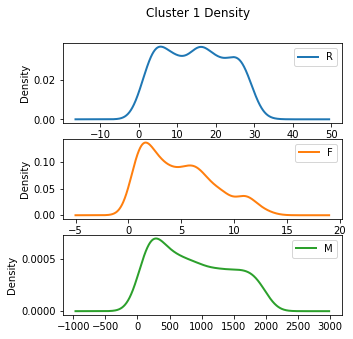

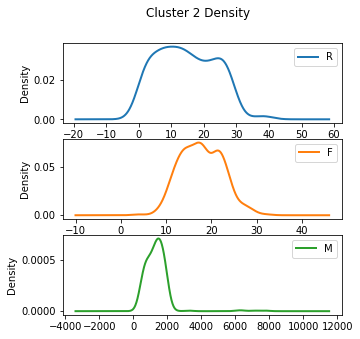

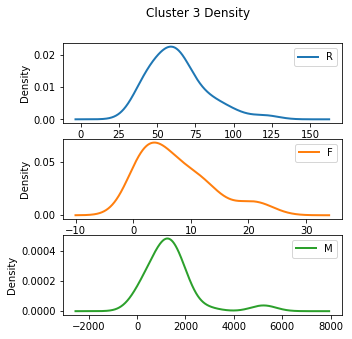

In [24]:
for i in range(k):
    density_plot(data[data_r['类别']==i], i)

## 用TSNE进行数据降维并展示聚类

In [25]:
from sklearn.manifold import TSNE

In [26]:
tsne = TSNE()

In [27]:
tsne.fit_transform(data_norm)

array([[-25.195274 ,   4.339681 ],
       [ 12.038131 , -26.216093 ],
       [ -4.3624296,  35.31157  ],
       ...,
       [  1.5516468,  -2.3026824],
       [ -4.715278 ,  -6.5423107],
       [-13.47827  , -12.9450245]], dtype=float32)

In [28]:
tsne = pd.DataFrame(tsne.embedding_, index=data_norm.index)

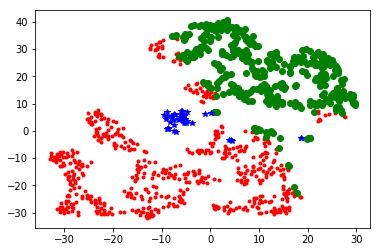

In [35]:
d0 = tsne[data_r['类别']==0]
d1 = tsne[data_r['类别']==1]
d2 = tsne[data_r['类别']==2]
plt.plot(d0[0], d0[1], 'r.')
plt.plot(d1[0], d1[1], 'go')
plt.plot(d2[0], d2[1], 'b*')
plt.show()